In [40]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [41]:
df = pd.read_csv('../../data/raw/wine-quality-white-and-red.csv')

In [42]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [43]:
df = df[df['total sulfur dioxide'] < 300]

In [44]:
df = df[df['free sulfur dioxide'] < 120]

In [45]:
df = df[df['residual sugar'] < 50]

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6486 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6486 non-null   object 
 1   fixed acidity         6486 non-null   float64
 2   volatile acidity      6486 non-null   float64
 3   citric acid           6486 non-null   float64
 4   residual sugar        6486 non-null   float64
 5   chlorides             6486 non-null   float64
 6   free sulfur dioxide   6486 non-null   float64
 7   total sulfur dioxide  6486 non-null   float64
 8   density               6486 non-null   float64
 9   pH                    6486 non-null   float64
 10  sulphates             6486 non-null   float64
 11  alcohol               6486 non-null   float64
 12  quality               6486 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 709.4+ KB


In [47]:
df['type_num'] = df['type'].map({'white': 1, 'red': 2})

In [48]:
med_alc_sug = df.groupby('residual sugar')['alcohol'].mean()

df['alc-sug'] = df['residual sugar'].map(med_alc_sug)

In [49]:
med_qua_sug = df.groupby('residual sugar')['quality'].mean()

df['qua-sug'] = df['residual sugar'].map(med_qua_sug)

In [50]:
med_chlo_aci= df.groupby('type_num')['volatile acidity'].mean()

df['aci-type'] = df['type_num'].map(med_qua_sug)

In [54]:
df.drop(columns='type', inplace=True)

In [52]:
df['alc-citr'] = df['alcohol'] * df['chlorides']

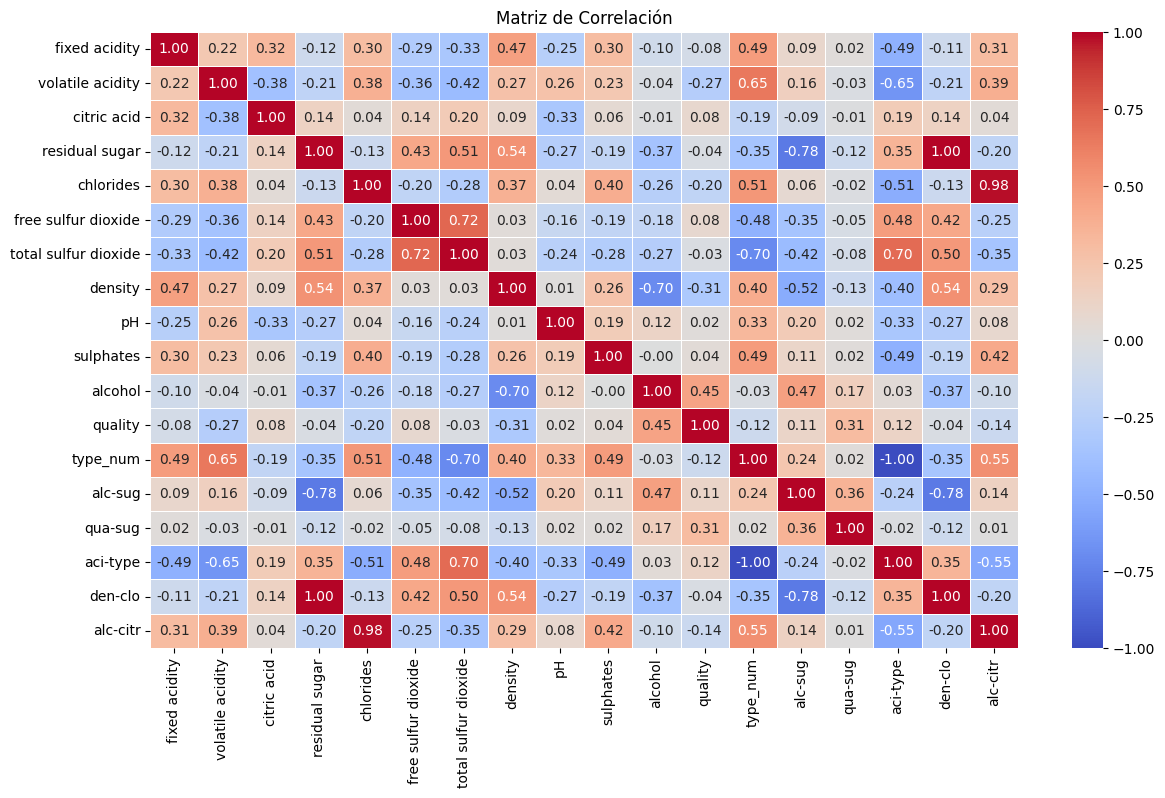

In [55]:
plt.figure(figsize=(14, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

In [56]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_num,alc-sug,qua-sug,aci-type,den-clo,alc-citr
count,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000
mean,7.214747,0.339582,0.318654,5.432562,0.056037,30.384443,115.453592,0.994688,3.218438,0.531244,10.492157,5.821153,1.246531,10.492157,5.821153,5.709609,5.411164,0.577196
std,1.296742,0.164540,0.145366,4.697102,0.035059,17.182716,56.036163,0.002948,0.160726,0.148858,1.193207,0.870358,0.431024,0.559293,0.268680,0.000119,4.690645,0.336707
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,1.000000,8.500000,4.000000,5.709402,0.595560,0.121500
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000,10.255556,5.709677,5.709677,1.792571,0.404200
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000,10.672460,5.812834,5.709677,2.989350,0.479700
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,155.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000,10.788827,5.917647,5.709677,8.063995,0.662100
max,15.900000,1.580000,1.660000,31.600000,0.611000,118.500000,294.000000,1.010300,4.010000,2.000000,14.900000,9.000000,2.000000,13.400000,8.000000,5.709677,31.925480,5.743400


In [57]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [58]:
train.corr()['quality']


fixed acidity          -0.083857
volatile acidity       -0.263262
citric acid             0.076652
residual sugar         -0.038473
chlorides              -0.199629
free sulfur dioxide     0.080073
total sulfur dioxide   -0.025011
density                -0.317780
pH                      0.020932
sulphates               0.034335
alcohol                 0.445802
quality                 1.000000
type_num               -0.125163
alc-sug                 0.115719
qua-sug                 0.318377
aci-type                0.125163
den-clo                -0.039290
alc-citr               -0.134784
Name: quality, dtype: float64

In [59]:
test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_num,alc-sug,qua-sug,aci-type,den-clo,alc-citr
3105,7.7,0.26,0.51,2.6,0.045,26.0,159.0,0.99126,3.00,0.50,11.2,6,1,10.687202,5.750000,5.709677,2.577276,0.5040
5467,6.2,0.36,0.24,2.2,0.095,19.0,42.0,0.99460,3.57,0.57,11.7,6,2,10.672460,5.812834,5.709402,2.188120,1.1115
3491,8.0,0.20,0.44,1.0,0.057,24.0,111.0,0.99158,3.09,0.32,11.2,6,1,10.850000,5.709677,5.709677,0.991580,0.6384
708,7.7,0.20,0.44,13.9,0.050,44.0,130.0,0.99855,3.11,0.48,10.0,6,1,9.600000,6.789474,5.709677,13.879845,0.5000
4577,6.3,0.15,0.34,11.4,0.050,25.0,96.0,0.99754,3.21,0.49,10.0,6,1,9.614286,6.071429,5.709677,11.371956,0.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4920,7.9,0.43,0.21,1.6,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5,2,10.666592,5.784753,5.709402,1.594560,1.0070
5878,9.1,0.50,0.30,1.9,0.065,8.0,17.0,0.99774,3.32,0.71,10.5,6,2,10.509375,5.738636,5.709402,1.895706,0.6825
4264,5.8,0.20,0.16,1.4,0.042,44.0,99.0,0.98912,3.23,0.37,12.2,6,1,10.656881,5.871560,5.709677,1.384768,0.5124
2315,7.7,0.42,0.38,8.1,0.061,49.0,144.0,0.99660,3.40,0.58,11.0,6,1,10.039352,5.805556,5.709677,8.072460,0.6710


In [60]:
X = train.drop(columns=['quality'])  
y = train['quality']  

oversampler = RandomOverSampler(random_state=42)

X_resampled, y_resampled = oversampler.fit_resample(X, y)

df_balanced = pd.concat([X_resampled, y_resampled], axis=1)

In [61]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15645 entries, 0 to 15644
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         15645 non-null  float64
 1   volatile acidity      15645 non-null  float64
 2   citric acid           15645 non-null  float64
 3   residual sugar        15645 non-null  float64
 4   chlorides             15645 non-null  float64
 5   free sulfur dioxide   15645 non-null  float64
 6   total sulfur dioxide  15645 non-null  float64
 7   density               15645 non-null  float64
 8   pH                    15645 non-null  float64
 9   sulphates             15645 non-null  float64
 10  alcohol               15645 non-null  float64
 11  type_num              15645 non-null  int64  
 12  alc-sug               15645 non-null  float64
 13  qua-sug               15645 non-null  float64
 14  aci-type              15645 non-null  float64
 15  den-clo            

In [62]:
X=df_balanced.drop(columns=['quality'])
y=df_balanced['quality']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [64]:
pipe = Pipeline(steps=[("scaler", StandardScaler()),
    ('classifier', RandomForestClassifier())
])

param_grid ={
    'classifier': [RandomForestClassifier()],
    'classifier__max_features': [1,2,3,4],
    'classifier__n_estimators': [100, 150,200],
    'classifier__max_depth': [2, 5, 10],
    
       
}

rf = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classifier': [RandomForestClassifier()],
                         'classifier__max_depth': [2, 5, 10],
                         'classifier__max_features': [1, 2, 3, 4],
                         'classifier__n_estimators': [100, 150, 200]},
             scoring='accuracy')

In [65]:
print(rf.best_estimator_)
print(rf.best_score_)
print(rf.best_params_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=10, max_features=1,
                                        n_estimators=150))])
0.8603382011873292
{'classifier': RandomForestClassifier(), 'classifier__max_depth': 10, 'classifier__max_features': 1, 'classifier__n_estimators': 150}


In [66]:
final_model= rf.best_estimator_.fit(X_train, y_train)
y_pred = rf.best_estimator_.predict(X_test)

In [67]:
final_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=10, max_features=1,
                                        n_estimators=150))])

In [68]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [69]:
print("Matriz de Confusión:")
print(cm)
print("\nTasa de Aciertos (Accuracy): {:.2f}%".format(accuracy * 100))

Matriz de Confusión:
[[441   0   0   0   0   0   0]
 [  0 457   0   0   2   0   0]
 [  0  23 349  52  26   3   0]
 [  1  10 109 194 129  10   0]
 [  0   2  13  29 393   5   0]
 [  0   0   0   0   6 433   0]
 [  0   0   0   0   0   0 442]]

Tasa de Aciertos (Accuracy): 86.58%


In [177]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('classifier', GradientBoostingClassifier())  
])

param_grid = {
    'classifier__n_estimators': [ 150,200],
    'classifier__learning_rate': [0.2,0.5,1],
    'classifier__max_depth': [5,7,9],
    
}

gb = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

gb.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.2, 0.5, 1],
                         'classifier__max_depth': [5, 7, 9],
                         'classifier__n_estimators': [150, 200]},
             scoring='accuracy')

In [178]:
print(gb.best_estimator_)
print(gb.best_score_)
print(gb.best_params_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.2, max_depth=9,
                                            n_estimators=150))])
0.9158679446219382
{'classifier__learning_rate': 0.2, 'classifier__max_depth': 9, 'classifier__n_estimators': 150}


In [179]:
gb_model= gb.best_estimator_.fit(X_train,y_train)
y_pred2 = gb.best_estimator_.predict(X_test)

In [180]:
cm2 = confusion_matrix(y_test, y_pred2)
accuracy2 = accuracy_score(y_test, y_pred2)
print("Matriz de Confusión:")
print(cm2)
print("\nTasa de Aciertos (Accuracy): {:.2f}%".format(accuracy2 * 100))

Matriz de Confusión:
[[441   0   0   0   0   0   0]
 [  0 459   0   0   0   0   0]
 [  2   0 376  63  11   1   0]
 [  2   1  79 310  59   2   0]
 [  0   0   1  20 417   3   1]
 [  0   0   0   0   0 439   0]
 [  0   0   0   0   0   0 442]]

Tasa de Aciertos (Accuracy): 92.17%


In [69]:
pipe3 = Pipeline(steps=[("scaler", StandardScaler()),
    ('classifier', svm.SVC())
])


svm_param = {
    'classifier': [svm.SVC()],
    'classifier__C': [0.001, 0.1, 0.5, 1, 5, 10, 100,200],
    
}    

svc = GridSearchCV(pipe3, svm_param, cv=5, scoring='accuracy', n_jobs=-1)

svc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             n_jobs=-1,
             param_grid={'classifier': [SVC()],
                         'classifier__C': [0.001, 0.1, 0.5, 1, 5, 10, 100,
                                           200]},
             scoring='accuracy')

In [70]:
print(svc.best_estimator_)
print(svc.best_score_)
print(svc.best_params_)

Pipeline(steps=[('scaler', StandardScaler()), ('classifier', SVC(C=200))])
0.840763479990146
{'classifier': SVC(), 'classifier__C': 200}


In [71]:
svc_model= svc.best_estimator_.fit(X_train,y_train)
y_pred3 = svc.best_estimator_.predict(X_test)

In [72]:
cm3 = confusion_matrix(y_test, y_pred3)
accuracy3 = accuracy_score(y_test, y_pred3)
print("Matriz de Confusión:")
print(cm3)
print("\nTasa de Aciertos (Accuracy): {:.2f}%".format(accuracy3 * 100))

Matriz de Confusión:
[[441   0   0   0   0   0   0]
 [  0 459   0   0   0   0   0]
 [  4  32 321  71  22   3   0]
 [  1  19  92 214 104  21   2]
 [  0   6  19  26 354  37   0]
 [  0   0   0   0   4 435   0]
 [  0   0   0   0   0   0 442]]

Tasa de Aciertos (Accuracy): 85.20%


In [5]:
train = pd.read_csv('../../data/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5197 entries, 0 to 5196
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5197 non-null   float64
 1   volatile acidity      5197 non-null   float64
 2   citric acid           5197 non-null   float64
 3   residual sugar        5197 non-null   float64
 4   chlorides             5197 non-null   float64
 5   free sulfur dioxide   5197 non-null   float64
 6   total sulfur dioxide  5197 non-null   float64
 7   density               5197 non-null   float64
 8   pH                    5197 non-null   float64
 9   sulphates             5197 non-null   float64
 10  alcohol               5197 non-null   float64
 11  quality               5197 non-null   int64  
 12  type_num              5197 non-null   int64  
 13  alc-sug               5197 non-null   float64
 14  qua-sug               5197 non-null   float64
dtypes: float64(13), int64

In [6]:
X = train.drop(columns=['quality'])  
y = train['quality']  

oversampler = RandomOverSampler(random_state=42)

X_resampled, y_resampled = oversampler.fit_resample(X, y)

df_balanced = pd.concat([X_resampled, y_resampled], axis=1)

In [7]:
X=df_balanced.drop(columns=['quality'])
y=df_balanced['quality']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [9]:
pipe4 = Pipeline(steps=[("scaler", StandardScaler()),
    ('classifier', KNeighborsClassifier())
])

knn_params = {
    'classifier': [KNeighborsClassifier()],
    'classifier__n_neighbors': [3, 5, 7,9,15],
}

knn = GridSearchCV(pipe4, knn_params, cv=5, scoring='accuracy', n_jobs=-1)

knn.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'classifier': [KNeighborsClassifier()],
                         'classifier__n_neighbors': [3, 5, 7, 9, 15]},
             scoring='accuracy')

In [10]:
print(knn.best_estimator_)
print(knn.best_score_)
print(knn.best_params_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', KNeighborsClassifier(n_neighbors=3))])
0.8462694356644442
{'classifier': KNeighborsClassifier(), 'classifier__n_neighbors': 3}


In [11]:
knn_mod= knn.best_estimator_.fit(X_train,y_train)
y_pred4 = knn.best_estimator_.predict(X_test)

In [12]:
knn

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'classifier': [KNeighborsClassifier()],
                         'classifier__n_neighbors': [3, 5, 7, 9, 15]},
             scoring='accuracy')

In [13]:
cm4 = confusion_matrix(y_test, y_pred4)
accuracy4 = accuracy_score(y_test, y_pred4)
print("Matriz de Confusión:")
print(cm4)
print("\nTasa de Aciertos (Accuracy): {:.2f}%".format(accuracy4 * 100))

Matriz de Confusión:
[[449   0   0   0   0   0   0]
 [  0 472   0   0   0   0   0]
 [  6  38 305  85  30   0   0]
 [  2  12 128 217  78  11   0]
 [  0   2  18  35 392   9   0]
 [  0   0   0   0   0 435   0]
 [  0   0   0   0   0   0 436]]

Tasa de Aciertos (Accuracy): 85.63%


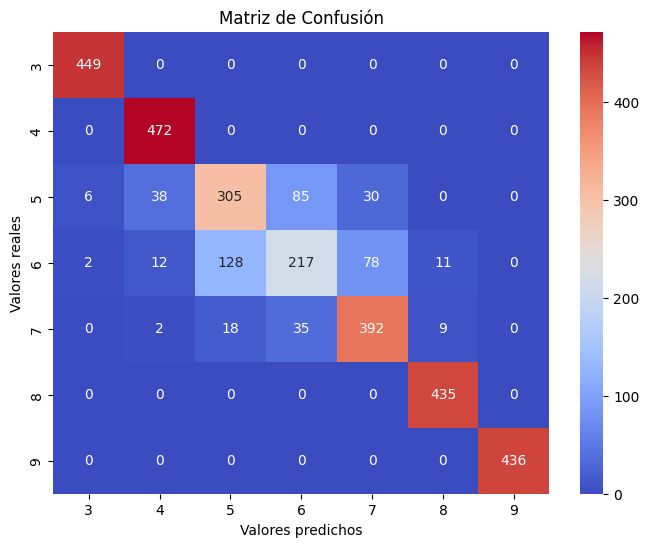

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm4, annot=True, fmt='g', cmap='coolwarm', xticklabels=sorted(set(y_pred4)), yticklabels=sorted(set(y)))
plt.title('Matriz de Confusión')
plt.xlabel('Valores predichos')
plt.ylabel('Valores reales')
plt.show()

In [163]:
X=df_balanced.drop(columns=['quality','sulphates','residual sugar','pH','den-clo','pH' ])
y=df_balanced['quality']

In [164]:
X.describe()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,alcohol,type_num,alc-sug,qua-sug,aci-type,alc-citr
count,15645.000000,15645.000000,15645.000000,15645.000000,15645.000000,15645.000000,15645.000000,15645.000000,15645.000000,15645.000000,15645.000000,15645.000000,15645.000000
mean,7.252317,0.358976,0.318074,0.051524,29.146532,111.795845,0.993952,10.858863,1.188942,10.581865,5.824597,5.709625,0.540887
std,1.307186,0.203105,0.141132,0.038182,18.333643,53.117200,0.003113,1.361994,0.391475,0.547842,0.336486,0.000108,0.360581
min,3.800000,0.080000,0.000000,0.009000,1.000000,6.000000,0.987110,8.000000,1.000000,8.500000,4.000000,5.709402,0.121500
25%,6.500000,0.240000,0.260000,0.033000,16.000000,82.000000,0.991100,9.700000,1.000000,10.376471,5.709677,5.709677,0.375000
50%,7.000000,0.300000,0.320000,0.042000,27.000000,115.000000,0.993900,10.700000,1.000000,10.672460,5.812834,5.709677,0.445900
75%,7.600000,0.400000,0.390000,0.057000,39.000000,146.000000,0.996700,12.200000,1.000000,10.850000,5.918919,5.709677,0.574200
max,15.900000,1.580000,1.230000,0.611000,118.500000,294.000000,1.010300,14.900000,2.000000,13.400000,8.000000,5.709677,5.743400


In [165]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [120]:
from sklearn.tree import DecisionTreeRegressor

In [121]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [122]:
model = DecisionTreeRegressor(random_state=0)

param = {
    "max_depth": [3, 4, 5],
    "min_samples_split": [3, 4, 6],
    "min_samples_leaf": [2, 4, 6],
    "criterion": ["squared_error", "absolute_error"]
}

dtr_gs = GridSearchCV(model, param, cv=5, scoring="neg_mean_absolute_error", n_jobs=-1)

dtr_gs.fit(X_train, y_train)

best_model = dtr_gs.best_estimator_

In [123]:
best_model

DecisionTreeRegressor(criterion='absolute_error', max_depth=5,
                      min_samples_leaf=2, min_samples_split=3, random_state=0)

In [124]:
y_pred = best_model.predict(X_test)

In [125]:
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 0.6893576222435283
Mean Absolute Percentage Error (MAPE): 13.733354639394909%
Mean Squared Error (MSE): 1.2735698306168104
Root Mean Squared Error (RMSE): 1.1285255117261686


In [127]:
from sklearn.ensemble import GradientBoostingRegressor
pipe2 = Pipeline([
    ('scaler', StandardScaler()),  
    ('gb', GradientBoostingRegressor())  
])

param2 = {
    'gb__n_estimators': [50, 100, 200],
    'gb__learning_rate': [ 0.2, 0.5, 1],
    'gb__max_depth': [3, 4, 5,6]
}

gb_gs = GridSearchCV(pipe2, param2, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1)

gb_gs.fit(X_train, y_train)

best_model2 = gb_gs.best_estimator_


In [128]:
best_model2

Pipeline(steps=[('scaler', StandardScaler()),
                ('gb',
                 GradientBoostingRegressor(learning_rate=0.5, max_depth=6,
                                           n_estimators=200))])

In [129]:
y_pred2 = best_model2.predict(X_test)

In [130]:
mae = mean_absolute_error(y_test, y_pred2)
mape = np.mean(np.abs((y_test - y_pred2) / y_test)) * 100
mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 0.13542209019645807
Mean Absolute Percentage Error (MAPE): 2.3760403343959564%
Mean Squared Error (MSE): 0.1292636388430169
Root Mean Squared Error (RMSE): 0.3595325282127014


In [88]:
comparador = pd.DataFrame({'y_pred': y_pred2, 'y': y_test})
comparador['resta'] = comparador['y']-comparador['y_pred']

In [94]:
df_balanced.corr()['quality']

fixed acidity          -0.107514
volatile acidity       -0.329831
citric acid             0.221512
residual sugar         -0.032435
chlorides              -0.350065
free sulfur dioxide     0.216974
total sulfur dioxide    0.087548
density                -0.451687
pH                      0.074583
sulphates              -0.000865
alcohol                 0.566664
type_num               -0.228266
alc-sug                 0.066218
qua-sug                 0.364752
aci-type                0.228266
quality                 1.000000
Name: quality, dtype: float64

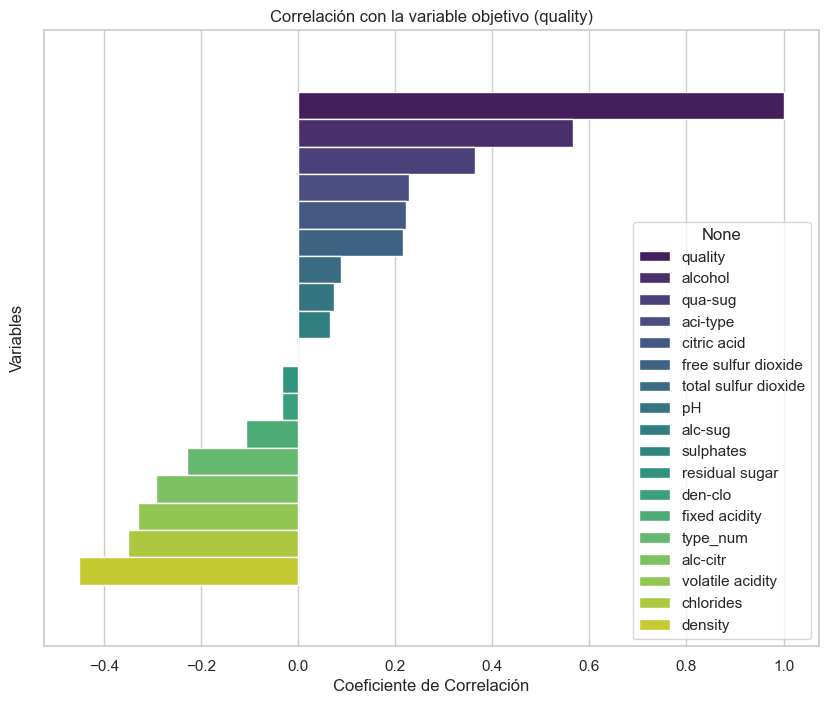

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
correlation = df_balanced.corr()['quality'].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=correlation.values, hue=correlation.index, palette="viridis")
plt.title('Correlación con la variable objetivo (quality)')
plt.xlabel('Coeficiente de Correlación')
plt.ylabel('Variables')
plt.show()

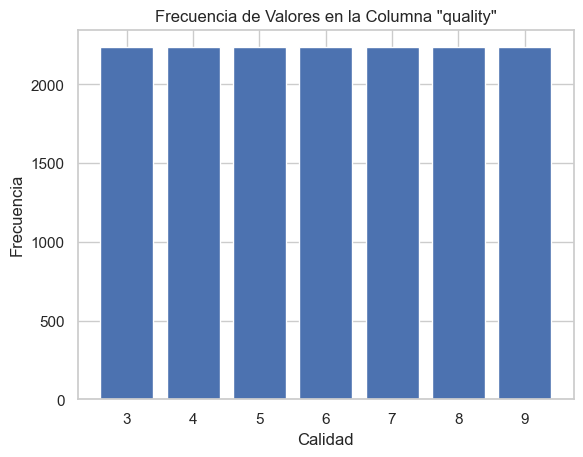

In [193]:

plt.bar(df_balanced['quality'].value_counts().index, df_balanced['quality'].value_counts().values)

plt.title('Frecuencia de valores de quality')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.show()

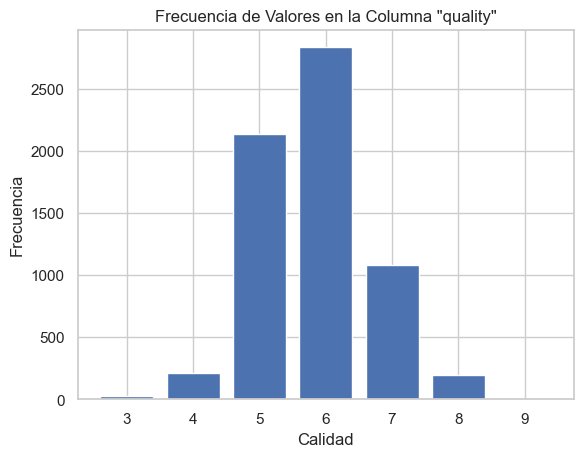

In [194]:
plt.bar(df['quality'].value_counts().index, df['quality'].value_counts().values)

# Personalizar el gráfico
plt.title('Frecuencia de valores de quality')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.show()

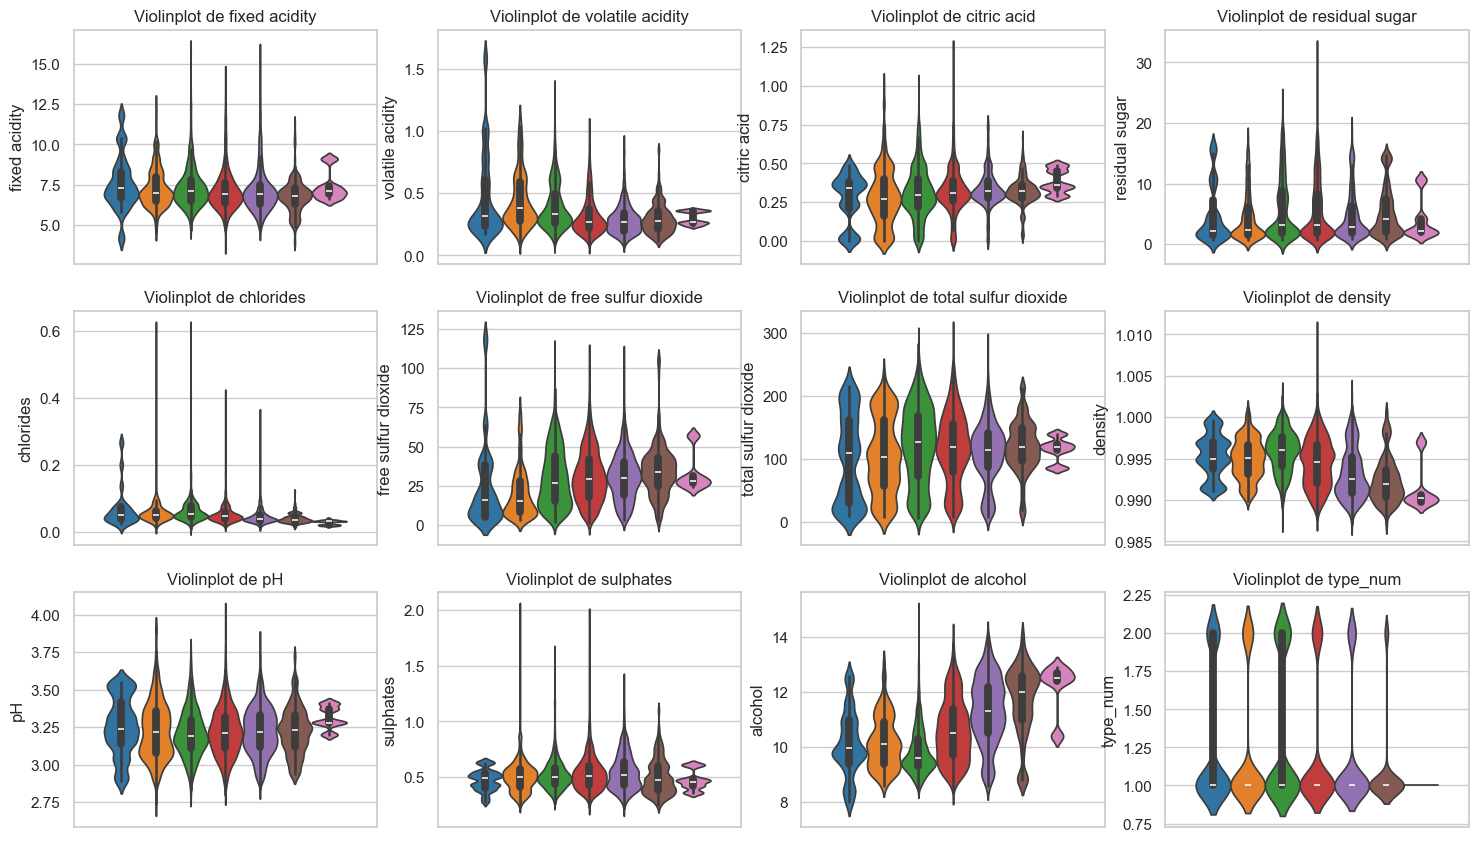

In [213]:


columnas = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
             'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 
             'density', 'pH', 'sulphates', 'alcohol', 'type_num']

plt.figure(figsize=(18, 14))
for i, j in enumerate(columnas, 1):
    plt.subplot(4, 4, i)
    sns.violinplot(hue='quality', y=j, data=df_balanced,palette='tab10', legend=False)
    plt.title(f'Violinplot de {j}')

plt.show()

In [132]:
from sklearn.ensemble import RandomForestRegressor
pipe3 = Pipeline([
    ('scaler', StandardScaler()),  
    ('rf', RandomForestRegressor())  
])

param3 = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [ 5, 10, 15],
    'rf__min_samples_split': [2, 5, 8],
    'rf__min_samples_leaf': [1, 2]
}

rf_gs = GridSearchCV(pipe3, param3, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

rf_gs.fit(X_train, y_train)
best_model3 = rf_gs.best_estimator_


In [133]:
best_model3

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestRegressor(max_depth=15, n_estimators=200))])

In [134]:
y_pred3 = best_model3.predict(X_test)

In [135]:
mae = mean_absolute_error(y_test, y_pred3)
mape = np.mean(np.abs((y_test - y_pred3) / y_test)) * 100
mse = mean_squared_error(y_test, y_pred3)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 0.15614561230494298
Mean Absolute Percentage Error (MAPE): 2.7326029086158923%
Mean Squared Error (MSE): 0.10059691454702269
Root Mean Squared Error (RMSE): 0.3171701665463237


In [144]:
from sklearn.linear_model import Lasso
pipe4 = Pipeline([
    ('scaler', StandardScaler()),  
    ('lasso', Lasso())  
])

param4 = {
    'lasso__alpha': [0.01, 0.1, 1.0, 10.0]
}

lasso_gs = GridSearchCV(pipe4, param4, cv=5, scoring='neg_mean_absolute_percentage_error', n_jobs=-1)

lasso_gs.fit(X_train, y_train)

best_model4 = lasso_gs.best_estimator_

In [145]:
best_model4

Pipeline(steps=[('scaler', StandardScaler()), ('lasso', Lasso(alpha=0.01))])

In [146]:
y_pred4 = best_model4.predict(X_test)

In [147]:
mae = mean_absolute_error(y_test, y_pred4)
mape = np.mean(np.abs((y_test - y_pred4) / y_test)) * 100
mse = mean_squared_error(y_test, y_pred4)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 1.0453988954970892
Mean Absolute Percentage Error (MAPE): 20.55381810345171%
Mean Squared Error (MSE): 1.6857396928727346
Root Mean Squared Error (RMSE): 1.2983603863614812


In [148]:
from sklearn.svm import SVR
pipe5 = Pipeline([
    ('scaler', StandardScaler()),  
    ('svr', SVR())  
])

param5 = {
    'svr__kernel': ['linear', 'rbf'],
    'svr__C': [0.1, 1, 10],
    'svr__epsilon': [0.1, 0.2, 0.5]
}

svr_gs = GridSearchCV(pipe5, param5, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1)

svr_gs.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svr', SVR())]),
             n_jobs=-1,
             param_grid={'svr__C': [0.1, 1, 10],
                         'svr__epsilon': [0.1, 0.2, 0.5],
                         'svr__kernel': ['linear', 'rbf']},
             scoring='neg_mean_absolute_error')

In [149]:
best_model5 = svr_gs.best_estimator_
best_model5

Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR(C=10))])

In [150]:
y_pred5 = best_model5.predict(X_test)

In [151]:
mae = mean_absolute_error(y_test, y_pred5)
mape = np.mean(np.abs((y_test - y_pred5) / y_test)) * 100
mse = mean_squared_error(y_test, y_pred5)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 0.41947896593069156
Mean Absolute Percentage Error (MAPE): 7.576048328343285%
Mean Squared Error (MSE): 0.47602919172672276
Root Mean Squared Error (RMSE): 0.6899486877491128


In [109]:

rf_model = RandomForestRegressor(n_estimators=200, random_state=42, max_depth=15)
rf_model.fit(X_train, y_train)

y_pred6 = rf_model.predict(X_test)



In [158]:
mae = mean_absolute_error(y_test, y_pred6)
mape = np.mean(np.abs((y_test - y_pred6) / y_test)) * 100
mse = mean_squared_error(y_test, y_pred6)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 0.12508677681548946
Mean Absolute Percentage Error (MAPE): 2.1837040760743465%
Mean Squared Error (MSE): 0.08389778413532636
Root Mean Squared Error (RMSE): 0.2896511421267425


In [169]:
X_train

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,alcohol,type_num,alc-sug,qua-sug,aci-type,alc-citr
4600,6.7,0.360,0.28,0.034,29.0,81.0,0.99151,12.5,1,10.376471,5.735294,5.709677,0.4250
7907,7.9,0.280,0.32,0.038,9.0,76.0,0.99200,11.7,1,11.210000,6.133333,5.709677,0.4446
4800,6.0,0.260,0.32,0.029,48.0,180.0,0.99011,12.0,1,11.024138,6.241379,5.709677,0.3480
3256,5.6,0.695,0.06,0.042,9.0,84.0,0.99432,10.2,1,10.442857,5.892857,5.709677,0.4284
5340,8.5,0.260,0.21,0.074,41.0,197.0,0.99800,9.8,1,9.542857,5.142857,5.709677,0.7252
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,7.1,0.320,0.32,0.038,16.0,66.0,0.99370,11.5,1,9.509524,5.428571,5.709677,0.4370
13418,6.6,0.360,0.29,0.021,24.0,85.0,0.98965,12.4,1,10.666592,5.784753,5.709677,0.2604
5390,8.5,0.260,0.21,0.074,41.0,197.0,0.99800,9.8,1,9.542857,5.142857,5.709677,0.7252
860,6.0,0.270,0.15,0.056,35.0,128.0,0.99360,8.8,1,10.707558,5.854651,5.709677,0.4928


In [166]:
from sklearn.decomposition import PCA
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('rf', RandomForestRegressor())
])

param_grid = {
    'pca__n_components': [5, 10, 15],
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [5, 10, 15],
    'rf__min_samples_split': [2, 5, 8],
    'rf__min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)



c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
270 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\migue\App

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('rf', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'pca__n_components': [5, 10, 15],
                         'rf__max_depth': [5, 10, 15],
                         'rf__min_samples_leaf': [1, 2],
                         'rf__min_samples_split': [2, 5, 8],
                         'rf__n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [174]:
pipe6 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10)),  
    ('regressor', RandomForestRegressor(n_estimators=150, max_depth=12))
])

pca_gs = GridSearchCV(pipe6, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1)

pca_gs.fit(X_train, y_train)
best_model6 = pca_gs.best_estimator_

In [175]:
pipeline

Pipeline(steps=[('pca', PCA(n_components=10)),
                ('regressor',
                 RandomForestRegressor(max_depth=12, n_estimators=150))])

In [167]:
best_model6 = grid_search.best_estimator_
best_model6

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=10)),
                ('rf', RandomForestRegressor(max_depth=15, n_estimators=200))])

In [168]:
y_pred6 = best_model.predict(X_test)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- cluster


In [176]:
mae = mean_absolute_error(y_test, y_pred6)
mape = np.mean(np.abs((y_test - y_pred6) / y_test)) * 100
mse = mean_squared_error(y_test, y_pred6)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 0.228991352632126
Mean Absolute Percentage Error (MAPE): 4.0175967339965135%
Mean Squared Error (MSE): 0.1601851270170488
Root Mean Squared Error (RMSE): 0.40023134187248355
